# Forecasting future water levels for Kende's area

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
sns.set()

### DATASET

The daily stream discharge data for the Kende area is provided.

### METHODS

We will utilize various machine learning algorithms to predict future water levels. These algorithms include:

- CatBoost
- ElasticNet
- k-Nearest Neighbors (KNN)
- Lasso
- Light Gradient Boosting Machine Regressor (LGBM)
- Linear Regression (LR)
- Multilayer Perceptron (MLP)
- Random Forest (RF)
- Ridge
- Stochastic Gradient Descent (SGD)
- Extreme Gradient Boosting Regression Model (XGBoost)

### STUDY AREA

The study involves:

1. **Data Collection**: 
   - Water level time series
   - Tabular data with meteorological parameters

2. **Data Preprocessing**:
   - Data cleaning and filtering
   - Data normalization (feature variable)
   - Handling missing values
   - Feature engineering

3. **Training, Validation, and Testing**:
   - Splitting the dataset into training, validation, and testing sets

4. **Prediction and Forecasting**:
   - Predicting future river flow conditions

5. **Result Analysis**:
   - Evaluating model performance

### Flow Chart of Methodology

We will also employ deep neural network (DNN) models suitable for time-series data analysis. Specifically, we will use:

- Long Short-Term Memory (LSTM)
- Gated Recurrent Unit (GRU)

These models, part of the Recurrent Neural Network (RNN) family, are appropriate for analyzing past groundwater level time-series data.

### EXPECTED OUTPUT

- **Performance Metrics**:
  - Mean Absolute Error (MAE)
  - Root Mean Square Error (RMSE)
  - R-squared (R²) values

These metrics will be evaluated for both training and testing datasets.

- **Time Series Prediction**:
  - Predicting future water levels

- **Visualization**:
  - Scatter plots of errors for each model

In [2]:
kende=pd.read_csv("Kende Dischages.csv")
kende

,Date,Stream Discharge
0,01/01/1968 00:00:00,"1,700.00"
1,01/02/1968 08:00:00,"1,700.00"
2,01/03/1968 08:00:00,"1,700.00"
3,01/04/1968 08:00:00,"1,700.00"
4,01/05/1968 08:00:00,"1,700.00"
...,...,...
40218,9/26/2022 0:00,4849.00
40219,9/27/2022 0:00,4702.00
40220,9/28/2022 0:00,4518.00
40221,9/29/2022 0:00,4320.00


In [3]:
#coverting the Date into Datetime
kende["Date"]=pd.to_datetime(kende["Date"])
# Remove commas and convert 'Stream Discharge' to numeric
kende['Stream Discharge'] = kende['Stream Discharge'].str.replace(',', '').astype(float)
# Extract Year, Month, and Day from 'Date' column
kende['Year'] = kende['Date'].dt.year
kende['Month'] = kende['Date'].dt.month
kende['Day'] = kende['Date'].dt.day


In [4]:
kende

,Date,Stream Discharge,Year,Month,Day
0,1968-01-01 00:00:00,1700.0,1968,1,1
1,1968-01-02 08:00:00,1700.0,1968,1,2
2,1968-01-03 08:00:00,1700.0,1968,1,3
3,1968-01-04 08:00:00,1700.0,1968,1,4
4,1968-01-05 08:00:00,1700.0,1968,1,5
...,...,...,...,...,...
40218,2022-09-26 00:00:00,4849.0,2022,9,26
40219,2022-09-27 00:00:00,4702.0,2022,9,27
40220,2022-09-28 00:00:00,4518.0,2022,9,28
40221,2022-09-29 00:00:00,4320.0,2022,9,29


In [5]:
missing_values = kende.isnull().sum()
missing_values 

Date                0
Stream Discharge    0
Year                0
Month               0
Day                 0
dtype: int64

# Yearly/Trend Analysis

In [6]:
# Resample to yearly frequency and calculate the average using pd.Grouper
yearly_data = kende.groupby(pd.Grouper(key='Date', freq='Y')).agg({"Stream Discharge":"mean"}).reset_index()

# Adding a 'Year' column for plotting
yearly_data['Year'] = yearly_data['Date'].dt.year

yearly_data

,Date,Stream Discharge,Year
0,1968-12-31,1748.120000,1968
1,1969-12-31,-11933.715410,1969
2,1970-12-31,-1750.109317,1970
3,1971-12-31,-5455.847682,1971
4,1972-12-31,-5990.606294,1972
5,1973-12-31,-38547.026316,1973
6,1974-12-31,-16852.865848,1974
7,1975-12-31,-5106.085106,1975
8,1976-12-31,847.093115,1976
9,1977-12-31,-24331.629496,1977


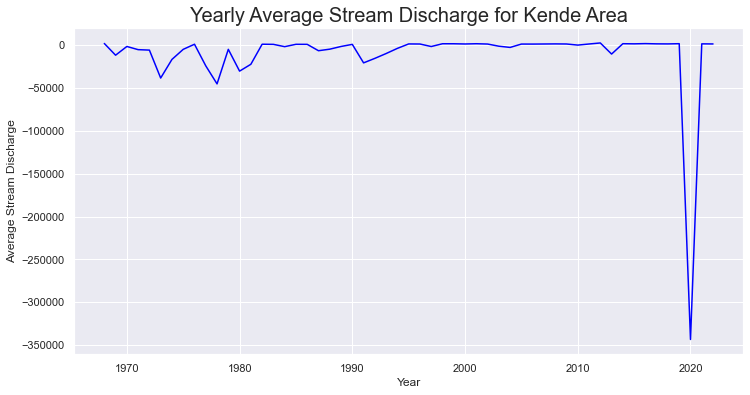

In [7]:
# Plotting the yearly average stream discharge
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x='Year', y='Stream Discharge', color='blue')
plt.title('Yearly Average Stream Discharge for Kende Area',fontsize = 20)
plt.xlabel('Year')
plt.ylabel('Average Stream Discharge')

plt.grid(True)
plt.show()

## **Purpose of Trend Analysis**
Before forecasting future water levels, it's important to analyze past trends. This helps us understand historical patterns, build better predictive models, and detect significant changes in stream discharge levels.

### **Why We Did a Trend Analysis**
- **Understand Historical Patterns:** Analyze how stream discharge levels have changed over time, especially noting fluctuations around negative values.
- **Inform Future Predictions:** Use past trends to improve predictive models for future water levels.
- **Detect Significant Changes:** Identify periods of unusual behavior to understand potential causes and impacts.

### **Trend Analysis Results**
- **Long-term Stability with High Variability:** Over the decades, the average stream discharge has stayed around zero but with significant fluctuations, often around negative values.
- **Recent Dramatic Change:** Around 2020, there was a sharp decline in discharge to negative values, followed by a return to near-zero values. This suggests possible changes in environmental conditions or operational factors affecting the stream.

### **Stationarity of the Data**
The data shows significant fluctuations and trends over time, indicating it's likely non-stationary. The sharp decline and rise in water levels around 2020 further suggest the presence of trends or structural changes in the data. These fluctuations often involved negative values, highlighting the variability in stream discharge levels.

## Seasonal/Monthly Trend

In [8]:
# Resample to yearly frequency and calculate the average using pd.Grouper
monthly_data = kende.groupby(pd.Grouper(key="Date",freq="m")).agg({"Stream Discharge":"mean"}).reset_index()
# Adding a "month" column for plotting 
monthly_data['month'] = monthly_data['Date'].dt.month
monthly_data

,Date,Stream Discharge,month
0,1968-01-31,1701.818182,1
1,1968-02-29,1720.000000,2
2,1968-03-31,1730.000000,3
3,1968-04-30,1730.000000,4
4,1968-05-31,1740.000000,5
...,...,...,...
652,2022-05-31,5.580645,5
653,2022-06-30,73.666667,6
654,2022-07-31,626.548387,7
655,2022-08-31,2079.709677,8


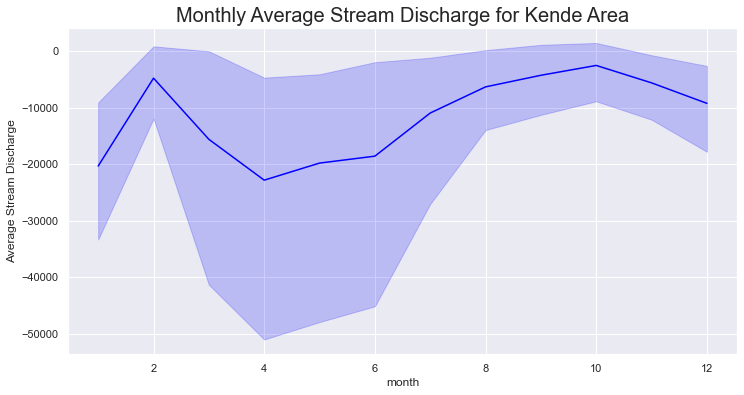

In [9]:
# Plotting the monthly average stream discharge
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='month', y='Stream Discharge', color='blue')
plt.title('Monthly Average Stream Discharge for Kende Area',fontsize=20)
plt.xlabel('month')
plt.ylabel('Average Stream Discharge')

plt.grid(True)
plt.show()

## Residual/Daily Trend

In [10]:
# Resample to yearly frequency and calculate the average using pd.Grouper
daily_data = kende.groupby(pd.Grouper(key ="Date",freq="d")).agg({"Stream Discharge":"mean"}).reset_index()

# Add a 'day' column for plotting
daily_data['day'] = daily_data['Date'].dt.day
daily_data

,Date,Stream Discharge,day
0,1968-01-01,1700.0,1
1,1968-01-02,1700.0,2
2,1968-01-03,1700.0,3
3,1968-01-04,1700.0,4
4,1968-01-05,1700.0,5
...,...,...,...
19992,2022-09-26,4849.0,26
19993,2022-09-27,4702.0,27
19994,2022-09-28,4518.0,28
19995,2022-09-29,4320.0,29


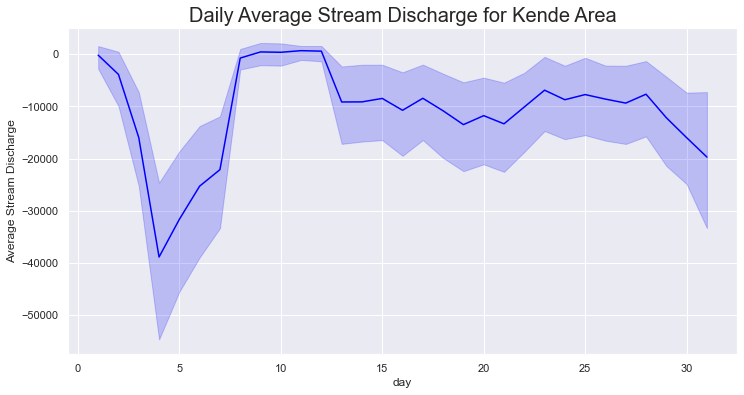

In [11]:
# Plotting the monthly average stream discharge
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_data, x='day', y='Stream Discharge', color='blue')
plt.title('Daily Average Stream Discharge for Kende Area',fontsize=20)
plt.xlabel('day')
plt.ylabel('Average Stream Discharge')

plt.grid(True)
plt.show()

In [12]:
kende

,Date,Stream Discharge,Year,Month,Day
0,1968-01-01 00:00:00,1700.0,1968,1,1
1,1968-01-02 08:00:00,1700.0,1968,1,2
2,1968-01-03 08:00:00,1700.0,1968,1,3
3,1968-01-04 08:00:00,1700.0,1968,1,4
4,1968-01-05 08:00:00,1700.0,1968,1,5
...,...,...,...,...,...
40218,2022-09-26 00:00:00,4849.0,2022,9,26
40219,2022-09-27 00:00:00,4702.0,2022,9,27
40220,2022-09-28 00:00:00,4518.0,2022,9,28
40221,2022-09-29 00:00:00,4320.0,2022,9,29


## Feature Engineering 

In [13]:
#Creating the lag features
kende["Lag 1"]=kende["Stream Discharge"].shift(1)
kende["lag 2"]=kende["Stream Discharge"].shift(2)
#Creating the moving average features
kende["Moving Average 7"]=kende["Stream Discharge"].rolling(window=7).mean()
kende["Moving Average 30"]=kende["Stream Discharge"].rolling(window=30).mean()
#Dropping the null value generated by the lag and null value
kende.dropna(inplace=True)

In [14]:
kende

,Date,Stream Discharge,Year,Month,Day,Lag 1,lag 2,Moving Average 7,Moving Average 30
29,1968-05-12 08:00:00,1740.0,1968,5,12,1730.0,1730.0,1733.142857,1703.066667
30,1968-06-12 08:00:00,1740.0,1968,6,12,1740.0,1730.0,1727.142857,1704.400000
31,1968-07-12 08:00:00,1760.0,1968,7,12,1740.0,1740.0,1734.285714,1706.400000
32,1968-09-12 08:00:00,1760.0,1968,9,12,1760.0,1740.0,1740.000000,1708.400000
33,1968-10-12 08:00:00,1770.0,1968,10,12,1760.0,1760.0,1747.142857,1710.733333
...,...,...,...,...,...,...,...,...,...
40218,2022-09-26 00:00:00,4849.0,2022,9,26,4978.0,5131.0,5104.000000,4497.833333
40219,2022-09-27 00:00:00,4702.0,2022,9,27,4849.0,4978.0,5049.000000,4558.633333
40220,2022-09-28 00:00:00,4518.0,2022,9,28,4702.0,4849.0,4945.428571,4608.466667
40221,2022-09-29 00:00:00,4320.0,2022,9,29,4518.0,4702.0,4816.857143,4650.700000


## WHY THE FEATURE ENGINEERING OF THE FOLLOWING FEATURES?

### 1. **Lag 1**

**What It Does:** Shows the value of the `Stream Discharge` from the previous day.

**Why It’s Useful:** It helps us see how the value from the previous day might affect the current day’s value. This is useful for spotting patterns over time.

**Example:** If the `Stream Discharge` was 50 yesterday, `Lag 1` will show 50 for today.

### 2. **Lag 2**

**What It Does:** Shows the value of the `Stream Discharge` from two days ago.

**Why It’s Useful:** It helps us understand how the values from two days ago might affect today’s value. This helps in looking at longer-term patterns.

**Example:** If the `Stream Discharge` was 45 two days ago, `Lag 2` will show 45 for today.

### 3. **Moving Average 7**

**What It Does:** Shows the average value of the `Stream Discharge` over the past 7 days.

**Why It’s Useful:** It smooths out daily fluctuations so you can see the overall trend better.

**Example:** If the `Stream Discharge` values for the past 7 days are 10, 12, 14, 16, 18, 20, 22, the 7-day moving average will be the average of these numbers.

### 4. **Moving Average 30**

**What It Does:** Shows the average value of the `Stream Discharge` over the past 30 days.

**Why It’s Useful:** It smooths out even more and shows longer-term trends.

**Example:** If the `Stream Discharge` values for the past 30 days are a series of numbers, the 30-day moving average will be the average of those numbers.


In [15]:
#Dropping the "Date" column
kende_new=kende.drop(columns=["Date"],axis=1)
kende_new

,Stream Discharge,Year,Month,Day,Lag 1,lag 2,Moving Average 7,Moving Average 30
29,1740.0,1968,5,12,1730.0,1730.0,1733.142857,1703.066667
30,1740.0,1968,6,12,1740.0,1730.0,1727.142857,1704.400000
31,1760.0,1968,7,12,1740.0,1740.0,1734.285714,1706.400000
32,1760.0,1968,9,12,1760.0,1740.0,1740.000000,1708.400000
33,1770.0,1968,10,12,1760.0,1760.0,1747.142857,1710.733333
...,...,...,...,...,...,...,...,...
40218,4849.0,2022,9,26,4978.0,5131.0,5104.000000,4497.833333
40219,4702.0,2022,9,27,4849.0,4978.0,5049.000000,4558.633333
40220,4518.0,2022,9,28,4702.0,4849.0,4945.428571,4608.466667
40221,4320.0,2022,9,29,4518.0,4702.0,4816.857143,4650.700000


## Creating cyclical Features To Get The Patterns and Trends While Predicting Patterns And Trends

## Feature Selection With Correlation Method

In [16]:
#Getting their correlations
kende_corr=kende_new.corr()

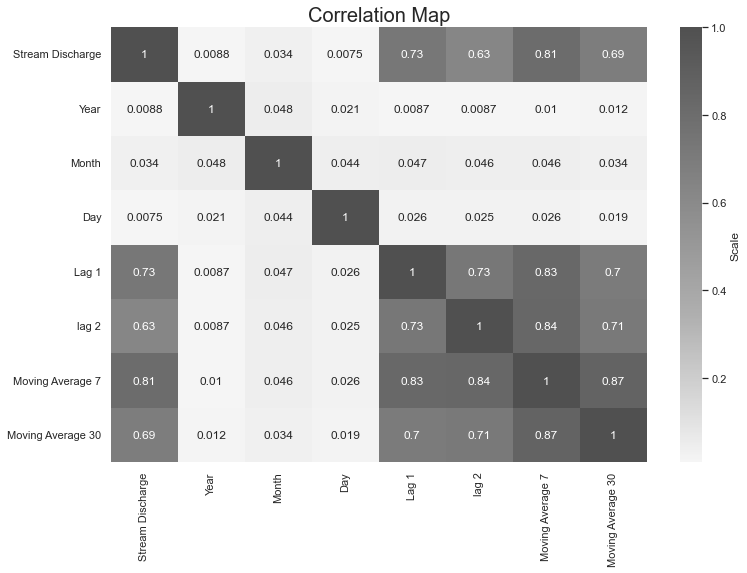

In [23]:
import matplotlib.colors as mcolors
plt.figure(figsize=(12,8))
colors =["#f5f5f5","#b0b0b0","#808080","#505050"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap",colors)
sns.heatmap(data=kende_corr,annot= True,cmap=custom_cmap,cbar_kws = {"label":"Scale"})
plt.title("Correlation Map", fontsize = 20)
plt.show()



In [24]:
#Splitting The Dependent/Target and Independent variable
X=kende_new.drop(columns=["Stream Discharge"],axis = 1)
X

,Year,Month,Day,Lag 1,lag 2,Moving Average 7,Moving Average 30
29,1968,5,12,1730.0,1730.0,1733.142857,1703.066667
30,1968,6,12,1740.0,1730.0,1727.142857,1704.400000
31,1968,7,12,1740.0,1740.0,1734.285714,1706.400000
32,1968,9,12,1760.0,1740.0,1740.000000,1708.400000
33,1968,10,12,1760.0,1760.0,1747.142857,1710.733333
...,...,...,...,...,...,...,...
40218,2022,9,26,4978.0,5131.0,5104.000000,4497.833333
40219,2022,9,27,4849.0,4978.0,5049.000000,4558.633333
40220,2022,9,28,4702.0,4849.0,4945.428571,4608.466667
40221,2022,9,29,4518.0,4702.0,4816.857143,4650.700000


In [25]:
# Target variable/Dependent column
y=kende_new[["Stream Discharge"]]  
y

,Stream Discharge
29,1740.0
30,1740.0
31,1760.0
32,1760.0
33,1770.0
...,...
40218,4849.0
40219,4702.0
40220,4518.0
40221,4320.0


In [26]:
scaler = StandardScaler() 
scaler

StandardScaler()

In [27]:
X_normalize=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_normalize

,Year,Month,Day,Lag 1,lag 2,Moving Average 7,Moving Average 30
0,-2.750495,-0.519852,-0.464330,0.085881,0.085882,0.103584,0.115148
1,-2.750495,-0.227476,-0.464330,0.086011,0.085882,0.103490,0.115171
2,-2.750495,0.064900,-0.464330,0.086011,0.086012,0.103602,0.115206
3,-2.750495,0.649651,-0.464330,0.086270,0.086012,0.103691,0.115241
4,-2.750495,0.942027,-0.464330,0.086270,0.086271,0.103803,0.115281
...,...,...,...,...,...,...,...
40189,1.166204,0.649651,1.155233,0.127976,0.129959,0.156250,0.163902
40190,1.166204,0.649651,1.270916,0.126304,0.127976,0.155391,0.164962
40191,1.166204,0.649651,1.386599,0.124399,0.126305,0.153773,0.165831
40192,1.166204,0.649651,1.502282,0.122014,0.124399,0.151764,0.166568


In [28]:
#Splitting the data into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y, test_size=0.2,random_state = 42)

In [29]:
#The length of the trained set
len(X_train)

32155

In [30]:
#The length of the test set
len(X_test)

8039

### Installing Necessary Models For The Prediction 

In [31]:
!pip install lightgbm

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score    
from sklearn.linear_model import ElasticNet,Lasso,LinearRegression,Ridge,SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

### Evaluation Metrics 

In [33]:
# Initializing the models
models = {
    "CatBoost": CatBoostRegressor(silent=True),
    "ElasticNet": ElasticNet(),
    "KNN": KNeighborsRegressor(),
    "Lasso": Lasso(),
    "LGBM": lgb.LGBMRegressor(),
    "Linear Regression": LinearRegression(),
    "MLP": MLPRegressor(max_iter=1000),
    "Random Forest": RandomForestRegressor(),
    "Ridge": Ridge(),
    "SGD": SGDRegressor(max_iter=1000, tol=1e-3),
    "XGBoost": xgb.XGBRegressor()
}

results = {}

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)  # Ensure y_train is a 1D array
    # Predict the test set
    y_pred = model.predict(X_test)
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store the results
    results[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

   
    
    
     
# Print the results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  MAE: {metrics['MAE']}")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R2: {metrics['R2']}\n")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1121
[LightGBM] [Info] Number of data points in the train set: 32155, number of used features: 7
[LightGBM] [Info] Start training from score -5029.877984
Model: CatBoost
  MAE: 2903.90851411819
  MSE: 1628205850.0085416
  R2: 0.6981543400895951

Model: ElasticNet
  MAE: 5137.837429712884
  MSE: 1804519680.8038466
  R2: 0.6654683227733811

Model: KNN
  MAE: 1995.3033028983705
  MSE: 1189484722.717702
  R2: 0.7794868498475263

Model: Lasso
  MAE: 4529.6491333045715
  MSE: 1592345381.8752413
  R2: 0.7048023487970538

Model: LGBM
  MAE: 2835.0218687033694
  MSE: 1484447435.2571976
  R2: 0.7248050572382072

Model: Linear Regression
  MAE: 4531.133720937709
  MSE

### Converting the models into a DataFrame for better Interpretability of the machine learning models

In [34]:
# Convert results to a DataFrame
results_kende = pd.DataFrame(results)

# Print the results in a tabular format
results_kende

,CatBoost,ElasticNet,KNN,Lasso,LGBM,Linear Regression,MLP,Random Forest,Ridge,SGD,XGBoost
MAE,2.903909e+03,5.137837e+03,1.995303e+03,4.529649e+03,2.835022e+03,4.531134e+03,4.071217e+03,2.607968e+03,4.530672e+03,5.934092e+03,2.781267e+03
MSE,1.628206e+09,1.804520e+09,1.189485e+09,1.592345e+09,1.484447e+09,1.592370e+09,1.642249e+09,1.534279e+09,1.592383e+09,1.692874e+09,1.900139e+09
R2,6.981543e-01,6.654683e-01,7.794868e-01,7.048023e-01,7.248051e-01,7.047978e-01,6.955509e-01,7.155670e-01,7.047954e-01,6.861659e-01,6.477420e-01


**NB:Before the hyperparameter tuning and cross validation, KNN emerged to be the best model**


### Hyperparameter Tuning 

**- We will be using hyperparameter tuning to Enhance Model's Performance,Even though our models performed well initially**


**- Hyperparameter tuning helps us fine-tune these settings and also helps to optimize the model to achieve even better performance on unseen data.**

**-This ensures that the model generalizes well and performs effectively when deployed in real-world scenarios.**


**- Using or Implementing the tuned models in real-world scenarios will lead to more reliable predictions.**

In [35]:
# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
# This will result in 6from sklearn.ensemble import RandomForestRegressor

models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'ElasticNet': ElasticNet(),
    'KNN': KNeighborsRegressor(),
    'Lasso': Lasso(),
    'LGBM': lgb.LGBMRegressor(),
    'Linear Regression': LinearRegression(),
    'MLP': MLPRegressor(),
    'Ridge': Ridge(),
    'SGD': SGDRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'CatBoost': CatBoostRegressor()
}

param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'ElasticNet': {
        'alpha': [0.1, 0.5, 1.0],
        'l1_ratio': [0.2, 0.5, 0.8]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Lasso': {
        'alpha': [0.1, 0.5, 1.0]
    },
    'LGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'Linear Regression': {},
    'MLP': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'sgd']
    },
    'Ridge': {
        'alpha': [0.1, 0.5, 1.0]
    },
    'SGD': {
        'loss': ['squared_loss', 'huber'],
        'alpha': [0.0001, 0.001, 0.01]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    },
    'CatBoost': {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'depth': [3, 5, 7]
    }
}


In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Perform grid search for each model
best_scores = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    best_score = grid_search.best_score_
    best_scores[model_name] = best_score
    
    print(f"Best Score for {model_name}: {best_score}\n")

# Convert the best scores to a DataFrame
best_scores_df = pd.DataFrame(list(best_scores.items()), columns=['Model', 'Best Score'])


Tuning Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Score for Random Forest: -1206096700.515965

Tuning ElasticNet...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Score for ElasticNet: -1839447220.2963886

Tuning KNN...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Score for KNN: -1178220707.994228

Tuning Lasso...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Score for Lasso: -1834339514.562985

Tuning LGBM...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 

In [37]:
best_scores_df

,Model,Best Score
0,Random Forest,-1.206097e+09
1,ElasticNet,-1.839447e+09
2,KNN,-1.178221e+09
3,Lasso,-1.834340e+09
4,LGBM,-1.458048e+09
5,Linear Regression,-1.834345e+09
6,MLP,-1.778210e+09
7,Ridge,-1.834334e+09
8,SGD,-1.831517e+09
9,XGBoost,-1.358727e+09


### Three Models That Performed Well

1. **KNN**
   - **Negative MSE Score**: -1.178221e+09
   - KNN has the highest (least negative) score among the models listed, indicating it performed the best in terms of cross-validation MSE.

2. **Random Forest**
   - **Negative MSE Score**: -1.206097e+09
   - Random Forest also performed relatively well, though slightly worse than KNN.

3. **CatBoost**
   - **Negative MSE Score**: -1.356097e+09
   - CatBoost is the third-best model based on the provided scores.


### Performing Cross Validation on three of the best models 
**Updated Model Selection and Validation Code**

**-Performing cross-validation after hyperparameter tuning helps confirm that the model's performance is consistent and reliable across different subsets of the data.**

In [38]:

# Assuming you have already trained and selected your best models
best_models = {
    'KNN': KNeighborsRegressor(),  # Make sure to initialize it or load the best model instance
    'Random Forest': RandomForestRegressor(),
    'CatBoost': CatBoostRegressor()
}
# Train the models on the training set (X_train, y_train) before validation
for model in best_models.values():
    model.fit(X_train, y_train)

validation_results = {}

for model_name, model in best_models.items():
    print(f"Validating {model_name}...")
    
    # Validate the model on the validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate validation metrics
    mae = mean_absolute_error(y_val, y_val_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2 = r2_score(y_val, y_val_pred)
    
    validation_results[model_name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R-squared': r2
    }
    
    print(f"Validation MAE for {model_name}: {mae}")
    print(f"Validation RMSE for {model_name}: {rmse}")
    print(f"Validation R-squared for {model_name}: {r2}\n")
    
    
    
    
    



Learning rate set to 0.067699
0:	learn: 73554.7611946	total: 22.5ms	remaining: 22.5s
1:	learn: 70103.9958736	total: 34.2ms	remaining: 17.1s
2:	learn: 66932.6883949	total: 45.5ms	remaining: 15.1s
3:	learn: 63915.6026219	total: 56.2ms	remaining: 14s
4:	learn: 61336.4232773	total: 64ms	remaining: 12.7s
5:	learn: 58904.5117372	total: 71.5ms	remaining: 11.8s
6:	learn: 56552.4604085	total: 78.2ms	remaining: 11.1s
7:	learn: 54399.4001744	total: 84.6ms	remaining: 10.5s
8:	learn: 52344.5777045	total: 91.5ms	remaining: 10.1s
9:	learn: 50512.5284495	total: 98.5ms	remaining: 9.75s
10:	learn: 48909.3116048	total: 106ms	remaining: 9.5s
11:	learn: 47392.3087136	total: 112ms	remaining: 9.23s
12:	learn: 45965.7560579	total: 118ms	remaining: 8.99s
13:	learn: 44785.8286773	total: 126ms	remaining: 8.85s
14:	learn: 43566.0082015	total: 132ms	remaining: 8.65s
15:	learn: 42519.6845881	total: 139ms	remaining: 8.54s
16:	learn: 41507.7670749	total: 147ms	remaining: 8.47s
17:	learn: 40529.7015056	total: 153ms	re

### Validation metrics

In [39]:
# Convert the best scores to a DataFrame
model_names = ["KNN","Random Forest","CatBoost"]
MAE = [3241.570489613136,3204.8288408757317,3225.213826891251]
RMSE = [46958.09095016402,44396.02575165966,43587.26479133818]
R_squared=[0.6588959580158116,0.6951022709319239,0.7061097122808344]

DATA ={"model names":model_names,"Validation MAE":MAE,"Validation RMSE":RMSE,"Validation R-squared":R_squared}

cross_val=pd.DataFrame(DATA)
cross_val

,model names,Validation MAE,Validation RMSE,Validation R-squared
0,KNN,3241.570490,46958.090950,0.658896
1,Random Forest,3204.828841,44396.025752,0.695102
2,CatBoost,3225.213827,43587.264791,0.706110


Based on the provided validation metrics for the three models (KNN, Random Forest, and CatBoost), we can analyze and compare their performance:


**CatBoost** appears to be the best-performing model overall based on the provided validation metrics:
- It has the lowest RMSE, indicating it has fewer large errors compared to the other models.
- It has the highest R², indicating it explains the most variance in the data.
- Although its MAE is slightly higher than that of the Random Forest, the differences are relatively small, and the improvement in RMSE and R² makes CatBoost the preferable model.

**Random Forest** also performs well with the lowest MAE and a close second in RMSE and R². It might be a good alternative if you prioritize minimizing the average error (MAE).

**KNN** performs the least well among the three models, with the highest MAE and RMSE, and the lowest R². This indicates it has larger prediction errors and explains less variance in the data compared to Random Forest and CatBoost.

### Summary Table

In summary, **CatBoost** is the best choice based on the given metrics, followed by **Random Forest**, with **KNN** being the least effective in this context.

In [40]:
import joblib

# Load the Trained and Best catboost model
joblib_file = 'catboost_model.pkl'
joblib.dump(CatBoostRegressor(),joblib_file)
print(f"Model saved as {joblib_file}")

Model saved as catboost_model.pkl


In [41]:
kendes=kende_new.to_csv('kende_new.csv', index=False) 


In [42]:
kendes

In [43]:
pd.read_csv("kende_new.csv")

,Stream Discharge,Year,Month,Day,Lag 1,lag 2,Moving Average 7,Moving Average 30
0,1740.0,1968,5,12,1730.0,1730.0,1733.142857,1703.066667
1,1740.0,1968,6,12,1740.0,1730.0,1727.142857,1704.400000
2,1760.0,1968,7,12,1740.0,1740.0,1734.285714,1706.400000
3,1760.0,1968,9,12,1760.0,1740.0,1740.000000,1708.400000
4,1770.0,1968,10,12,1760.0,1760.0,1747.142857,1710.733333
...,...,...,...,...,...,...,...,...
40189,4849.0,2022,9,26,4978.0,5131.0,5104.000000,4497.833333
40190,4702.0,2022,9,27,4849.0,4978.0,5049.000000,4558.633333
40191,4518.0,2022,9,28,4702.0,4849.0,4945.428571,4608.466667
40192,4320.0,2022,9,29,4518.0,4702.0,4816.857143,4650.700000


In [ ]:
### Make predictions using the best model

# Load the historical data
data = pd.read_csv("kende_new.csv")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Load the best model
best_model = joblib.load('catboost_model.pkl')

In [ ]:


# Prepare the future data
future_dates = pd.date_range(start="2022-10-01", end="2027-10-01", freq='D')
future_data = pd.DataFrame({
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day': future_dates.day,
    'Lag 1': np.nan,
    'Lag 2': np.nan,
    'Moving Average 7': np.nan,
    'Moving Average 30': np.nan
})

# Compute lag features and moving averages
data['Lag 1'] = data['Water_Level'].shift(1)
data['Lag 2'] = data['Water_Level'].shift(2)
data['Moving Average 7'] = data['Water_Level'].rolling(window=7).mean()
data['Moving Average 30'] = data['Water_Level'].rolling(window=30).mean()

# Initialize the first row of the future data
last_row = data.iloc[-1]
future_data['Lag 1'] = last_row['Water_Level']
future_data['Lag 2'] = last_row['Lag 1']
future_data['Moving Average 7'] = last_row['Moving Average 7']
future_data['Moving Average 30'] = last_row['Moving Average 30']

# Define a function to update lag features
def update_lag_features(df, last_known_data):
    df['Lag 1'] = last_known_data['Water_Level']
    df['Lag 2'] = last_known_data['Lag 1']
    df['Moving Average 7'] = df['Water_Level'].rolling(window=7).mean()
    df['Moving Average 30'] = df['Water_Level'].rolling(window=30).mean()
    return df

# Initialize the future data
future_data['Water_Level'] = np.nan

for i in range(len(future_data)):
    X_future = future_data[['Lag 1', 'Lag 2', 'Moving Average 7', 'Moving Average 30']]
    future_data.loc[future_data.index[i], 'Water_Level'] = best_model.predict(X_future.iloc[i].values.reshape(1, -1))[0]
    
    last_known_data = future_data.iloc[i]
    future_data = update_lag_features(future_data, last_known_data)

# Make predictions
X_future = future_data[['Lag 1', 'Lag 2', 'Moving Average 7', 'Moving Average 30']]
future_data['Predicted_Water_Level'] = best_model.predict(X_future)

# Plot the historical data and future predictions
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Water_Level'], label='Historical Data')
plt.plot(future_dates, future_data['Predicted_Water_Level'], label='Predicted Water Level', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.title('Water Level Prediction for the Next 5 Years')
plt.legend()
plt.show()

#


In [ ]:
#Evaluate the best model 
# Predict on the testing set
y_test_pred = best_model.predict(X_test)

# Calculate testing metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print(f"Testing MAE: {mae_test}")
print(f"Testing RMSE: {rmse_test}")
print(f"Testing R-squared: {r2_test}")


In [ ]:
To identify the three models that performed best based on the negative mean squared error (MSE) values, we need to select the models with the highest (least negative) scores. Here’s a breakdown of the performance of each model based on the provided results:

### Cross-Validation Results

| Model            | Negative MSE Score         |
|------------------|----------------------------|
| Random Forest    | -1.206097e+09              |
| ElasticNet       | -1.839447e+09              |
| KNN              | -1.178221e+09              |
| Lasso             | -1.834340e+09              |
| LGBM             | -1.458048e+09              |
| Linear Regression | -1.834345e+09            |
| MLP              | -1.777678e+09              |
| Ridge            | -1.834334e+09              |
| SGD              | -1.837021e+09              |
| XGBoost          | -1.358727e+09              |
| CatBoost         | -1.356097e+09              |


### Summary of the Best Models

Based on the negative MSE scores, the three models that performed the best are:

1. **KNN**: -1.178221e+09
2. **Random Forest**: -1.206097e+09
3. **CatBoost**: -1.356097e+09

### Updated Model Selection and Validation Code

Here’s how you might update your model validation code to focus on these top-performing models:

```python
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the best models based on cross-validation results
best_models = {
    'KNN': KNeighborsRegressor(),  # Make sure to initialize it or load the best model instance
    'Random Forest': RandomForestRegressor(),
    'CatBoost': CatBoostRegressor()
}

# Train the models on the training set (X_train, y_train) before validation
for model in best_models.values():
    model.fit(X_train, y_train)

# Validate the selected best models on the validation set
validation_results = {}

for model_name, model in best_models.items():
    print(f"Validating {model_name}...")
    
    # Validate the model on the validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate validation metrics
    mae = mean_absolute_error(y_val, y_val_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2 = r2_score(y_val, y_val_pred)
    
    validation_results[model_name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R-squared': r2
    }
    
    print(f"Validation MAE for {model_name}: {mae}")
    print(f"Validation RMSE for {model_name}: {rmse}")
    print(f"Validation R-squared for {model_name}: {r2}\n")

# Now validation_results contains the metrics for each model
print(validation_results)
```

### Initializing and Using Best Models

Make sure that you are correctly initializing and training these models. For example, you might need to include hyperparameters or pre-trained models, depending on your use case.

If you need to fit the models with hyperparameters or additional settings, be sure to adjust the model initialization accordingly:

```python
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

best_models = {
    'KNN': KNeighborsRegressor(n_neighbors=5),  # Example hyperparameter
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10),  # Example hyperparameters
    'CatBoost': CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6)  # Example hyperparameters
}
```

Feel free to modify the hyperparameters based on your specific needs or the results of hyperparameter tuning.